<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/Exercises/mnist_digits_classification_conv_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of MNIST digits with convolutional layers


## Loading the image data



In [1]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


## Preparing the image data

Check why 4 parameters. Maybe the dimensionality is 1?

In [0]:
train_images = train_images_original.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## Deplaying some of the original and prepared image data and labels

In [4]:
train_images.shape

(60000, 28, 28, 1)

In [5]:
train_images_original.shape

(60000, 28, 28)

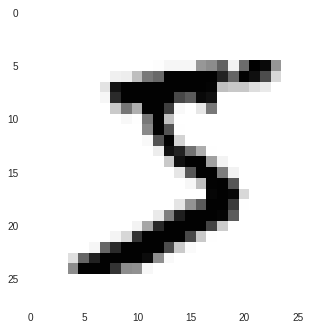

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[0])
plt.grid(None)
plt.show()

In [7]:
train_labels.shape

(60000, 10)

In [8]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import numpy as np

In [10]:
np.argmax(train_labels[0])

5

In [11]:
train_labels_original[0]

5

## The network architecture - convolutional layers

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

## The compilation step

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## The training step

In [14]:
epochs = 10
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs, 
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.1767 - acc: 0.9448 - val_loss: 0.0596 - val_acc: 0.9803
Epoch 2/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0475 - acc: 0.9851 - val_loss: 0.0371 - val_acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0322 - acc: 0.9898 - val_loss: 0.0310 - val_acc: 0.9907
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0249 - acc: 0.9923 - val_loss: 0.0319 - val_acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0190 - acc: 0.9940 - val_loss: 0.0256 - val_acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0153 - acc: 0.9952 - val_loss: 0.0340 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step -

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

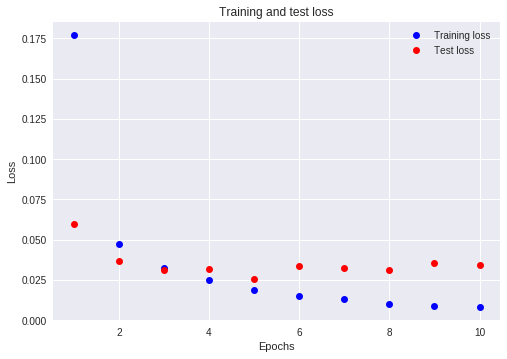

In [16]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

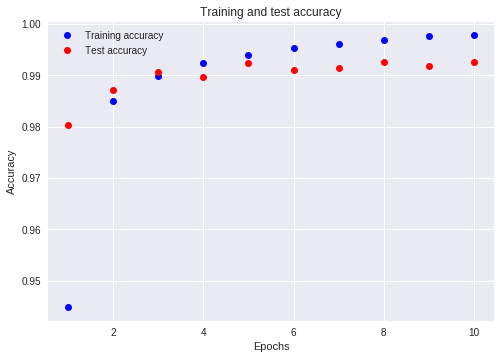

In [18]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Weired behaviour

Why is the test accuracy after epoch 1 so much better than the train accuracy?



## Showing some misclassified digits

In [0]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([4.8714318e-14, 4.8306096e-14, 1.0054983e-12, 9.3893621e-13,
       1.0370393e-14, 1.8622254e-16, 3.4524200e-21, 1.0000000e+00,
       5.2123060e-14, 1.7926731e-11], dtype=float32)

In [21]:
np.argmax(predictions[0])

7

In [22]:
test_labels_original[0]

7

In [0]:
predicted_labels = np.argmax(predictions, axis=1) 
predicted_labels = predicted_labels.astype('uint8')

In [24]:
predicted_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
wrong_indices = [i for i in range(10000) if predicted_labels[i] != test_labels_original[i]]

In [26]:
# The quantity below is equal to the test accuracy reported by the network fit method.
1.0 - len(wrong_indices) / 10000.0

0.9925

In [0]:
# This show the ith misclassified digit. 
i = 4
wrong_index = wrong_indices[i]  

In [28]:
predicted_labels[wrong_index]

6

In [29]:
test_labels_original[wrong_index]

2

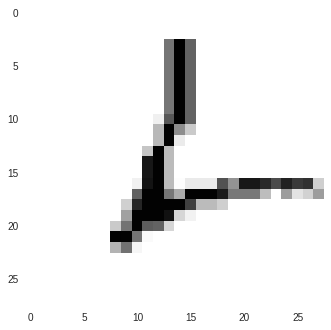

In [30]:
plt.imshow(test_images_original[wrong_index])
plt.grid(None)
plt.show()